# 붓꽃 품종 예측하기

사이킷런 설치

!pip install scikit-learn

In [2]:
#사이킷런 버전 확인
import sklearn
print(sklearn.__version__)

0.22.2.post1


## 데이터 적재

In [4]:
from sklearn.datasets import load_iris
iris_dataset = load_iris()

In [5]:
print('iris_dataset의 키 : \n{}'.format(iris_dataset.keys()))

iris_dataset의 키 : 
dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [6]:
#DESCR의 설명

print(iris_dataset['DESCR'][:193]+ '\n...')

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, pre
...


In [7]:
#target_names의 값은 우리가 예측하려는 붓꽃 품종의 이름을 문자열로 가지고 있다.
print('타깃의 이름 : {}'.format(iris_dataset['target_names']))

타깃의 이름 : ['setosa' 'versicolor' 'virginica']


In [9]:
print('특성의 이름 : {}'.format(iris_dataset['feature_names']))

특성의 이름 : ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [12]:
print('data 타입 : {}'.format(type(iris_dataset['data'])))

data 타입 : <class 'numpy.ndarray'>


In [13]:
print('data의 크기 :{}'.format(iris_dataset['data'].shape))

data의 크기 :(150, 4)


In [14]:
print('data의 처음 다섯행 :\n {}'.format(iris_dataset['data'][:5]))

data의 처음 다섯행 :
 [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


In [15]:
print('target의 타입 : {}'.format(type(iris_dataset['target'])))

target의 타입 : <class 'numpy.ndarray'>


In [16]:
print('target의 크기 : {}'.format(type(iris_dataset['target'].shape)))

target의 크기 : <class 'tuple'>


In [17]:
print('타깃: \n{}'.format(iris_dataset['target']))

타깃: 
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


## 성과 측정 : 훈련 데이터와 테스트 데이터

우리가 만든 모델이 새 데이터에 적용하기 전에 이 모델이 진짜 잘 작동하는지 알아야 함.

불행히도 모델을 만들 때 쓴 데이터는 평가 목적으로 사용 불가

훈련 데이터에 속한 어떤 데이터라도 정확히 맞출 수 있기 때문에.(기억 가능성 때문)

데이터를 기억한다는 것은 모델을 잘 **일반화**하지 않았다는 뜻(새로운 데이터에 대해서는 잘 작동을 안한다)

모델의 성능을 평가하려면 레이블을 알고 있는 (이전에 본적 없는) 새 데이터를 모델에 적용해봐야 함. 머신러닝 모델을 만들때 훈련데이터(Train data) 혹은 훈련 세트(train Set)로 훈련을 시키고, 모델이 잘 작동하는지 측정하는 것을 테스트 데이터(test data), 테스트 세트(test set) 혹은 홀드아웃 세트(hold-out set)라고 부름.

-scikit-learn 데이터는 대문자 X로 표시하고 레이블은 소문자 y로 표기함.

In [20]:
# Default : 75% and 25% 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(iris_dataset['data'], iris_dataset['target'], test_size = 0.2,random_state = 0)

In [21]:
print('X_train 크기:{}'.format(X_train.shape))
print('y_train 크기:{}'.format(y_train.shape))

X_train 크기:(120, 4)
y_train 크기:(120,)


In [23]:
print('X_test 크기:{}'.format(X_test.shape))
print('y_test 크기:{}'.format(y_test.shape))

X_test 크기:(30, 4)
y_test 크기:(30,)


### 가장 먼저 해야 할일 : 데이터 살펴보기

시각화는 데이터를 조사하는 아주 좋은 방법.

산점도(Scatter Matrix)가 그중 하나

그래프를 그려주려면 Numpy ->DataFrame으로 바꿔줘야 함

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1a57ab0278>,
      dtype=object)

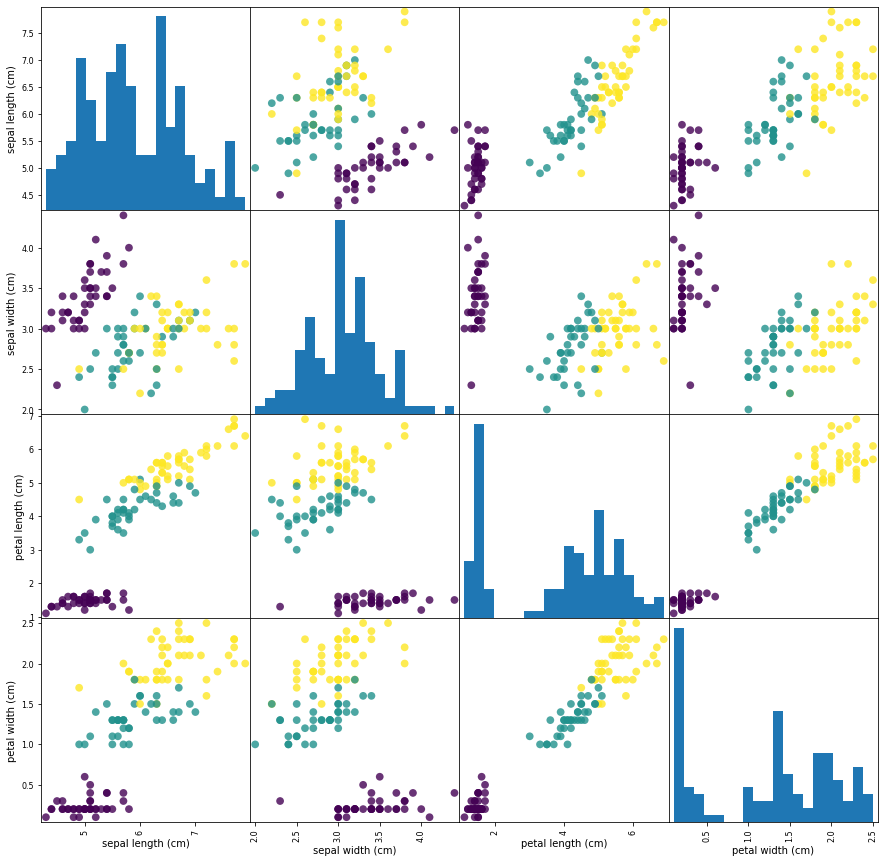

In [25]:
import pandas as pd
#X_train 데이터를 사용해서 데이터프레임을 만듬.

# 열의 이름은 iris_dataset.feature_names에 있는 문자열을 사용
iris_dataframe = pd.DataFrame(X_train,columns = iris_dataset.feature_names)

#데이터프레임을 사용해 y_train에 따라 색으로 구분된 산점도 행렬을 만듬
pd.plotting.scatter_matrix(iris_dataframe, c = y_train, figsize = (15,15), marker='o', hist_kwds={'bins':20}, s=60, alpha =0.8)


### 첫번째 머신러닝 모델 : K-최근접 이웃 알고리즘

- 새로운 데이터 포인트에 대한 예측이 필요하면 알고리즘은 새 데이터 포인트에서 가장 가까운 훈련 데이터 포인트를 찾음. 그런 다음 찾은 훈련 데이터의 레이블을 새 데이터 포인트의 레이블로 지정

- k는 가장 가까운 이웃 '하나'가 아니라 훈련 데이터에서 새로운 데이터 포인트에 가장 가까운 'k'개의 이웃을 찾는다는 뜻.

- 이웃들의 클래스 중 빈도가 가장 높은 클래스를 예측값으로 예측

In [26]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 1)

In [27]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

#### 예측하기 

- 야생에서 꽃받침의 길이가 5cm,폭이 2.9cm이고 꽃잎의 길이가 1cm,  폭이 0.2cm 인 붓꽃을 보았다고 가정. 이게 무슨 품종인지 맞추는 것을 예측한다고 하자

In [29]:
import numpy as np
X_new = np.array([[5, 2.9, 1, 0.2]])
print('X_new.shape : {}'.format(X_new.shape))

X_new.shape : (1, 4)


scikit-learn은 항상 데이터가 2차원 배열일 것으로 예상.

In [31]:
prediction = knn.predict(X_new)
print('예측 : {}'.format(prediction))
print('예측한 타깃의 이름 : {}'.format(iris_dataset['target_names'][prediction]))

예측 : [0]
예측한 타깃의 이름 : ['setosa']


### 모델의 신뢰 -> 모델 평가하기

In [33]:
y_pred = knn.predict(X_test)
print('테스트 세트에 대한 예측값 :\n {}'.format(y_pred))

테스트 세트에 대한 예측값 :
 [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0]


In [35]:
print('테스트 세트에 대한 정확도 : {:.2f}'.format(np.mean(y_pred == y_test)))

테스트 세트에 대한 정확도 : 1.00
